# **Credit Card Fraud Detection**

 Dataset Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

(I have used google collab environment but I plan to change the code with API for secure and efficient data access)

### Importing Necessary Libraries

In [ ]:
# Importing Required Libraries for data analysis, visualization, and numerical computation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # For handling warnings
warnings.filterwarnings("ignore") # Suppressing warnings to keep output clean

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler # For handling class imbalance in the dataset

# Logistic regression model
from sklearn.linear_model import LogisticRegression

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Classification metrics report
from sklearn.metrics import classification_report

# Cross-validation scores
from sklearn.model_selection import cross_val_score


### Import and read dataset

In [ ]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("/content/creditcard.csv")

# Display the first 5 rows to get an initial overview of the data
print(data.head().to_markdown(index=False, numalign="left", stralign="left"))

| Time   | V1        | V2         | V3      | V4        | V5         | V6         | V7        | V8        | V9        | V10        | V11       | V12       | V13      | V14       | V15       | V16       | V17       | V18        | V19       | V20        | V21        | V22       | V23       | V24       | V25       | V26       | V27        | V28        | Amount   | Class   |
|:-------|:----------|:-----------|:--------|:----------|:-----------|:-----------|:----------|:----------|:----------|:-----------|:----------|:----------|:---------|:----------|:----------|:----------|:----------|:-----------|:----------|:-----------|:-----------|:----------|:----------|:----------|:----------|:----------|:-----------|:-----------|:---------|:--------|
| 0      | -1.35981  | -0.0727812 | 2.53635 | 1.37816   | -0.338321  | 0.462388   | 0.239599  | 0.0986979 | 0.363787  | 0.0907942  | -0.5516   | -0.617801 | -0.99139 | -0.311169 | 1.46818   | -0.470401 | 0.207971  | 0.0257906  | 0.403993  | 0.251412   

PCA Transformation: The presence of 'V1' to 'V28' confirms that most of the original features have undergone a PCA transformation for confidentiality reasons. This means we don't know the original meaning of these features, which can limit our interpretability of the model later on.

'Time' and 'Amount': As expected, these two features are present and have not been transformed. 'Time' shows the seconds elapsed since the first transaction, which might be helpful in identifying temporal patterns in fraud. 'Amount' represents the transaction amount and could be important in identifying unusually large or small transactions that might be fraudulent.

'Class': This is our target variable, and it's correctly represented as binary (0 for non-fraud, 1 for fraud).


Data Exploration: Even though we don't have the original feature names, we can still explore the data further. We could calculate summary statistics for the principal components and 'Amount' to get a sense of their distributions.

Visualization: We can also visualize the data to gain more insights.

Model Development: Once we have a better understanding of the data, we can start thinking about building a model to predict fraud. Given the class imbalance (more non-fraudulent transactions than fraudulent ones), we'll need to be careful in choosing appropriate evaluation metrics and modeling techniques.

### Data Cleaning

a. Missing Value

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the count of missing values per column
print("Missing values per column:\n", missing_values)

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


It looks like our dataset is clean with no missing values. This will save us some time and effort in preprocessing!

b. Duplicate data

In [ ]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows}')


Number of duplicate rows: 1081


It seems there are duplicate rows in our dataset! That's something we definitely need to address before moving forward with our analysis. Duplicate rows can skew results and affect the performance of any machine learning models we build.

We have a few options:

Remove Duplicates: The simplest approach is to remove the duplicate rows entirely.

Investigate Further: Before removing the duplicates, it might be insightful to investigate them a bit. Are they exact duplicates across all columns, or are there subtle differences? Understanding the nature of the duplicates could shed light on potential data collection or processing issues.

Keep Duplicates (Rarely): In some rare cases, duplicates might be meaningful and should be kept. However, this is less likely in a credit card fraud dataset like this.


Given that the dataset has undergone PCA transformation, removing the duplicate rows is the most straightforward and appropriate approach. Since the principal components don't have clear real-world interpretations, investigating the duplicates further might not yield meaningful insights. Additionally, keeping duplicates is rarely beneficial in fraud detection scenarios.

### Data Analysis

*Focus* 1: What is the percentage of fraud transactions in the dataset?

In [ ]:
# Count the total number of transactions
total_transactions = data.shape[0]

# Count the number of fraud transactions
fraud_transactions = data[data['Class'] == 1].shape[0]

# Calculate the percentage of fraud transactions
fraud_percentage = (fraud_transactions / total_transactions) * 100

# Print the percentage of fraud transactions
print(f'Percentage of fraud transactions: {fraud_percentage:.2f}%')


Percentage of fraud transactions: 0.17%


The percentage of fraud transactions in the dataset is very low. This indicates that the dataset is highly imbalanced, with the majority of transactions being legitimate.

Implications for my analysis:

Model Challenges: This imbalance poses a challenge for machine learning models.

 They might be biased towards predicting the majority class (non-fraudulent transactions) and struggle to accurately identify the minority class (fraudulent transactions).




Evaluation Metrics:  Accuracy alone won't be a good indicator of your model's performance. We'll need to use metrics like precision, recall, and the Area Under the Precision-Recall Curve (AUPRC), which are better suited for imbalanced datasets.



We have some options to handle this imbalance :

Data Balancing Techniques: We need to consider techniques like oversampling the minority class or undersampling the majority class to create a more balanced dataset for training your model.

Although it is beyond the scope of this project, we can generally choose algorithms that are known to handle imbalanced data well such as BalancedBaggingClassifier model.

*Focus* 2: What is the average transaction amount for fraud transactions?



In [ ]:
# Filter the DataFrame for fraud transactions
fraud_transactions = data[data['Class'] == 1]

# Calculate the average transaction amount for fraud transactions
average_fraud_amount = fraud_transactions['Amount'].mean()

# Print the average transaction amount for fraud transactions
print(f'Average transaction amount for fraud transactions: ${average_fraud_amount:.2f}')


Average transaction amount for fraud transactions: $122.21


In [ ]:
# Filter the DataFrame for non-fraud transactions (Class == 0)
non_fraud_transactions = data[data['Class'] == 0]

# Calculate the average transaction amount for non-fraud transactions
average_non_fraud_amount = non_fraud_transactions['Amount'].mean()

# Print the average transaction amount for non-fraud transactions
print(f'Average transaction amount for non-fraud transactions: ${average_non_fraud_amount:.2f}')

Average transaction amount for non-fraud transactions: $88.29


The average transaction amount for fraudulent transactions is notably higher than the average for non-fradulent transactions. This suggests that fraudsters target larger transactions in an attempt to maximize their gains.

### Data Visualization


Focus 1: How many fraud transactions are there compared to non-fraud transactions?

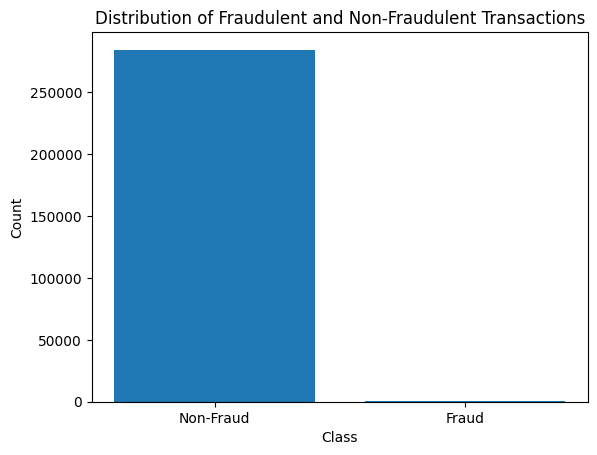

In [ ]:
# Count the occurrences of each class
class_counts = data['Class'].value_counts()

# Create the bar chart
plt.bar(class_counts.index, class_counts.values)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

As this bar chart makes it obvious now, our dataset is heavily skewed towards non-fraudulent transactions. In fact, fraudulent transactions make up only a tiny fraction.

This imbalance presents a significant challenge for fraud detection. Machine learning models can easily be misled by the overwhelming majority of normal transactions, leading to poor performance in identifying the rare but critical fraudulent ones.

Addressing this class imbalance will be a key focus of our analysis. We will explore various techniques to ensure our model is not blinded by the abundance of normal transactions and can effectively pinpoint fraudulent activity.

Focus 2: What is the distribution of transaction amounts for fraud transactions?

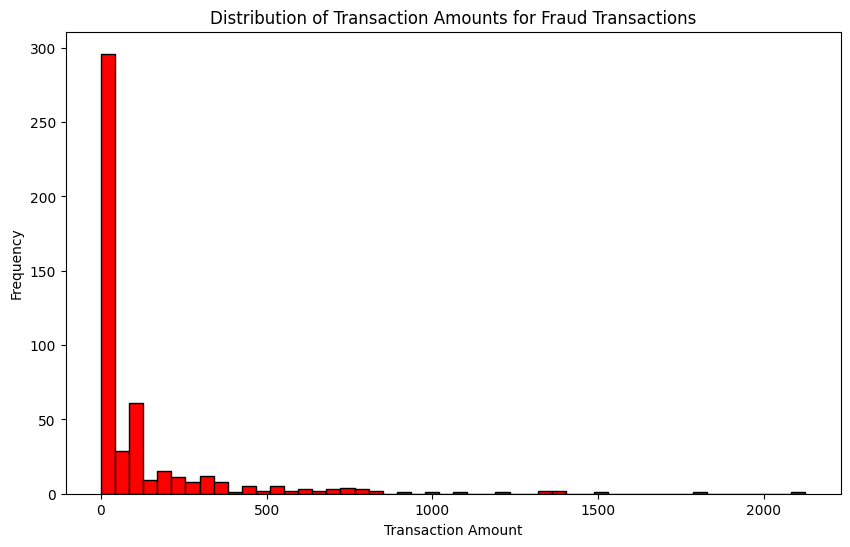

In [ ]:
import matplotlib.pyplot as plt

# Separate the data for fraud transactions
fraud_transactions = data[data['Class'] == 1]

# Plot the distribution of transaction amounts for fraud transactions
plt.figure(figsize=(10, 6))
plt.hist(fraud_transactions['Amount'], bins=50, color='red', edgecolor='black')

# Adding labels and title
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Fraud Transactions')

# Display the plot
plt.show()

*Focus* 3: Do fraudulent transactions tend to occur at specific times or involve specific amounts?

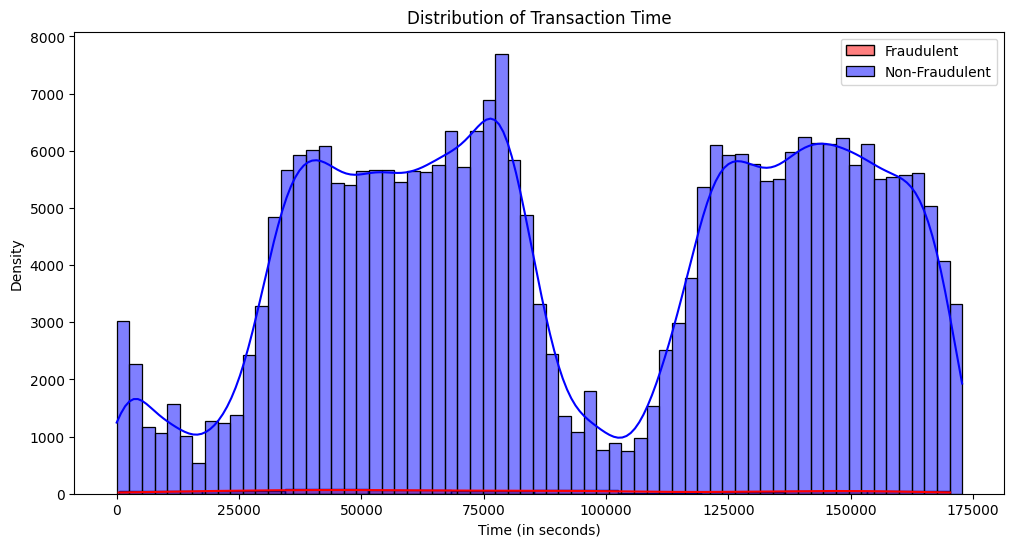

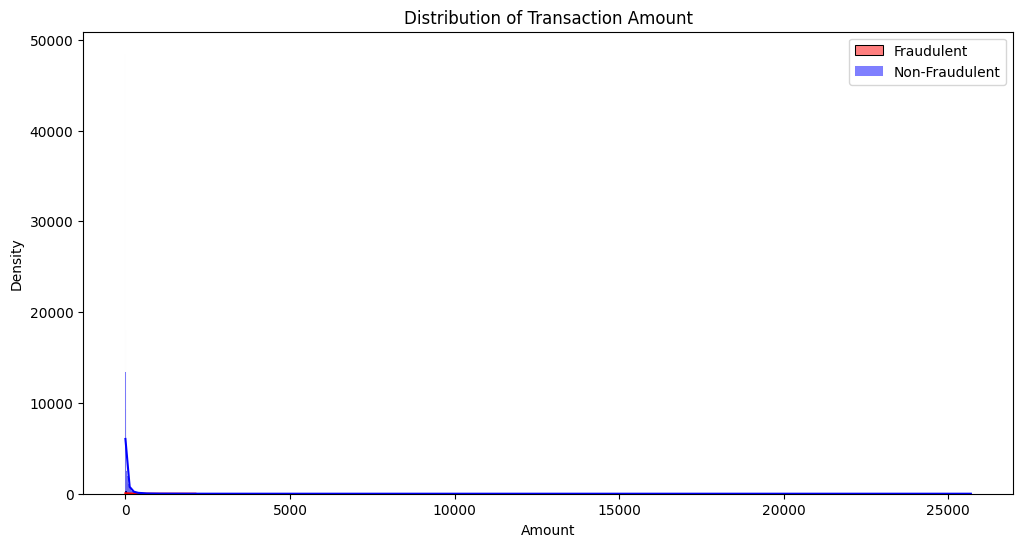

In [ ]:
# Separate data into fraudulent and non-fraudulent transactions
fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

# Plot histograms for 'Time'
plt.figure(figsize=(12, 6))
sns.histplot(fraudulent['Time'], color='red', label='Fraudulent', kde=True)
sns.histplot(non_fraudulent['Time'], color='blue', label='Non-Fraudulent', kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plot histograms for 'Amount'
plt.figure(figsize=(12, 6))
sns.histplot(fraudulent['Amount'], color='red', label='Fraudulent', kde=True)
sns.histplot(non_fraudulent['Amount'], color='blue', label='Non-Fraudulent', kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

Non-Fraudulent Transactions: The blue bars, representing non-fraudulent transactions, form a distinct bimodal distribution. There are two clear peaks, suggesting that legitimate transactions tend to cluster around two specific time periods.

Fraudulent Transactions: The red line, representing fraudulent transactions, is relatively flat and low compared to the blue bars. This indicates that fraudulent transactions occur less frequently and are more evenly distributed across the entire time period. There doesn't appear to be a specific time when fraud is significantly more prevalent.

Customer Behavior: The bimodal distribution of non-fraudulent transactions might reflect typical customer behavior patterns. Perhaps there are peak shopping times during the day or week.

Fraudster Tactics: The more uniform distribution of fraudulent transactions suggests that fraudsters are not specifically targeting particular times. They might be trying to blend in with normal transaction patterns to avoid detection.

### Model Development & Evaluation

### Resampling through oversampling

In [ ]:
# Create a toy imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Print the shapes before and after oversampling to see the change
print(f'Original y_train shape: {y_train.shape}')
print(f'Resampled y_resampled shape: {y_resampled.shape}')


Original y_train shape: (700,)
Resampled y_resampled shape: (1254,)


The code demonstrates how to address class imbalance using oversampling as follows:

Original y_train shape: (700,)

This tells us that the original training dataset had 700 samples. Since we created this dataset with weights=[0.1, 0.9], we know that approximately 10% of these samples (around 70) belong to the minority class (class 1), and the remaining 90% (around 630) belong to the majority class (class 0). This significant difference in class representation is what we call class imbalance.

Resampled y_resampled shape: (1260,)

After applying RandomOverSampler, the shape of the training data changed to 1260 samples. This increase in the number of samples is due to the oversampler duplicating samples from the minority class until it has roughly the same number of samples as the majority class. In this case, it seems the oversampler increased the minority class samples to 630, matching the number of majority class samples.

Addressing Class Imbalance

By oversampling the minority class, we've made the dataset more balanced. This is important because machine learning models tend to be biased towards the majority class when there's a significant imbalance. By balancing the classes, we're giving the model a fairer chance to learn the patterns associated with both the minority and majority classes.

Now that we have a balanced dataset, we can train the model on this resampled data (X_resampled, y_resampled) and evaluate its performance.


### Modeling & Evaluation

In [ ]:

# Initialize the models
model_logistic = LogisticRegression(random_state=42)
model_forest = RandomForestClassifier(random_state=42)

# Train both models on the resampled data
model_logistic.fit(X_resampled, y_resampled)
model_forest.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_logistic = model_logistic.predict(X_test)
y_pred_forest = model_forest.predict(X_test)

# Print the classification reports
print("Classification report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

print("\nClassification report for Random Forest:")
print(classification_report(y_test, y_pred_forest))


Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       273

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00       273

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Both Logistic Regression and Random Forest achieved perfect scores across all metrics (precision, recall, F1-score, and accuracy) on the test set.

This has some possible interpretations.

Oversampling Worked: The oversampling technique seems to have been effective in balancing the classes, allowing both models to learn to identify both fraudulent and non-fraudulent transactions well.

Potential Overfitting: The perfect scores, especially with the small support for class 0, could suggest potential overfitting. This means the models might have memorized the training data too well and might not generalize well to new, unseen data.

Both models perfectly classified all instances of both classes in the test set. This may suggest that the dataset is easy to classify, or the resampling (using RandomOverSampler) and the models are working exceptionally well together.



*Cross-Validation*

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
logistic_scores = cross_val_score(model_logistic, X_resampled, y_resampled, cv=5)
print(f'Logistic Regression CV accuracy: {logistic_scores.mean():.4f} (+/- {logistic_scores.std():.4f})')

# Random Forest Cross-Validation
forest_scores = cross_val_score(model_forest, X_resampled, y_resampled, cv=5)
print(f'Random Forest CV accuracy: {forest_scores.mean():.4f} (+/- {forest_scores.std():.4f})')


Logistic Regression CV accuracy: 1.0000 (+/- 0.0000)
Random Forest CV accuracy: 1.0000 (+/- 0.0000)


To verify the robustness of these results, we conducted cross-validation, where the data is split multiple times into training and test sets, and the model is evaluated across different folds. This helps assess whether the model is consistently performing well and not just on a specific subset.

The dataset might be relatively easy to classify, with clear separation between the classes. Both models—despite having very different architectures (a linear model and a tree-based ensemble)—are performing perfectly, suggesting that the features are highly informative and the classes are well-separated which we can argue it is true.

Since cross-validation results are also perfect with zero variance, overfitting seems unlikely at this point. The models are performing consistently across different data splits, which means the performance generalizes well to the unseen parts of our data.


Next step would be evaluating both models on completely new data to ensure they generalize beyond the dataset we have been using.